In [1]:
import itertools

In [2]:
with open("instructions.txt") as file:
    instructions = file.read()

In [3]:
instructions_list = ["".join(x) for _, x in itertools.groupby(instructions, key=str.isdigit)]
instructions_list = [int(instruction) if instruction.isdigit() else instruction for instruction in instructions_list]

In [4]:
with open("maze.txt") as file:
    maze = file.read().split("\n")

In [5]:
maze = [maze_row.ljust(len(maze[0]),' ') for maze_row in maze]

In [6]:
startindex = [0, maze[0].index('.')]

In [7]:
lookup = {
    "R": {"R": "D", "L": "U"},
    "L": {"R": "U", "L": "D"},
    "U": {"R": "R", "L": "L"},
    "D": {"R": "L", "L": "R"},
}
score = {"R": 0, "L": 2, "U": 3, "D": 1}


In [8]:
import numpy as np
from typing import List

In [9]:
def check_direction(new_index: List[int]) -> int:
    if 0<=new_index[0]<max_vertical_size and 0<=new_index[1]<max_horizontal_size:
        if maze[new_index[0]][new_index[1]] =="#":
            return 0
        elif maze[new_index[0]][new_index[1]] ==".":
            return 1
    return 2

# Part 1

In [25]:
max_vertical_size = len(maze)
max_horizontal_size = len(maze[0])
full_grid = np.zeros((max_vertical_size, max_horizontal_size))
direction = "R"
index = startindex.copy()
for instruction in instructions_list:
    if isinstance(instruction, int):
        for i in range(instruction):
            if direction == "R":
                new_index = [index[0], index[1] + 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    # Fix horizontal looping
                    if (
                        maze[index[0]][
                            min(
                                maze[index[0]].find(".")
                                if maze[index[0]].find(".") != -1
                                else 9999999,
                                maze[index[0]].find("#")
                                if maze[index[0]].find("#") != -1
                                else 9999999,
                            )
                        ]
                        == "#"
                    ):
                        break
                    else:
                        index = [index[0], maze[index[0]].find(".")]
            if direction == "L":
                new_index = [index[0], index[1] - 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index = (
                        len(maze[index[0]])
                        - min(
                            maze[index[0]][::-1].find(".")
                            if maze[index[0]][::-1].find(".") != -1
                            else 9999999,
                            maze[index[0]][::-1].find("#")
                            if maze[index[0]][::-1].find("#") != -1
                            else 9999999,
                        )
                        - 1
                    )
                    if maze[index[0]][try_index] == "#":
                        break
                    else:
                        index = [index[0], try_index]
            if direction == "D":
                new_index = [index[0] + 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    vertical_segment = "".join(
                        [maze[i][index[1]] for i in range(max_vertical_size)]
                    )
                    try_index = min(
                        vertical_segment.find(".")
                        if vertical_segment.find(".") != -1
                        else 9999999,
                        vertical_segment.find("#")
                        if vertical_segment.find("#") != -1
                        else 9999999,
                    )
                    if maze[try_index][index[1]] == "#":
                        break
                    else:
                        index = [try_index, index[1]]

            if direction == "U":
                if maze[index[0] - 1][index[1]] == ".":
                    index = [index[0] - 1, index[1]]
                elif maze[index[0] - 1][index[1]] == "#":
                    break
                else:
                    vertical_segment = "".join(
                        [maze[i][index[1]] for i in range(max_vertical_size)]
                    )
                    try_index = (
                        max_vertical_size
                        - min(
                            vertical_segment[::-1].find(".")
                            if vertical_segment[::-1].find(".") != -1
                            else 9999999,
                            vertical_segment[::-1].find("#")
                            if vertical_segment[::-1].find("#") != -1
                            else 9999999,
                        )
                        - 1
                    )
                    if maze[try_index][index[1]] == "#":
                        break
                    else:
                        index = [try_index, index[1]]

            full_grid[(index[0], index[1])] = ord(direction)
    else:
        direction = lookup[direction][instruction]
(index[0]+1)*1000+(index[1]+1)*4+score[direction]
# Should be larger then 161182

KeyboardInterrupt: 

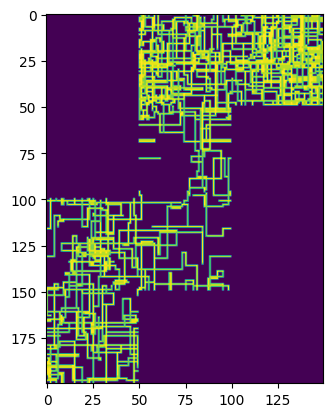

In [11]:
from matplotlib import pyplot as plt
plt.imshow(full_grid)

# Part 2

In [12]:
import math

In [13]:
nr = 1
cube_nrs = maze.copy()
for i in range(0, max_vertical_size, 50):
    min_loc = maze[i].find(".")
    max_loc = max_horizontal_size - maze[i][::-1].find(".")
    for k in range(math.ceil((max_loc-min_loc)/50)):
        for j in range(i,i+50):
            cube_nrs[j] = cube_nrs[j][0:min_loc+k*50]+str(nr)*50+cube_nrs[j][min_loc+(k+1)*50:]
        nr+=1

In [14]:
walk_matrix = {
    "1": {"U": ["6", "R"], "D": ["3", "D"], "R": ["2", "R"], "L": ["4", "R"]},
    "2": {"U": ["6", "U"], "D": ["3", "L"], "R": ["5", "L"], "L": ["1", "L"]},
    "3": {"U": ["1", "U"], "D": ["5", "D"], "R": ["2", "U"], "L": ["4", "D"]},
    "4": {"U": ["3", "R"], "D": ["6", "D"], "R": ["5", "R"], "L": ["1", "R"]},
    "5": {"U": ["3", "U"], "D": ["6", "L"], "R": ["2", "L"], "L": ["4", "L"]},
    "6": {"U": ["4", "U"], "D": ["2", "D"], "R": ["5", "U"], "L": ["1", "D"]},
}
indices_walkaround = {
    "1": {"4": [[[100, 0], [149, 0]], True], "6": [[[150, 0], [199, 0]], False]},
    "2": {
        "3": [[[50, 99], [99, 99]], False],
        "5": [[[100, 99], [149, 99]], True],
        "6": [[[199, 0], [199, 49]], False],
    },
    "3": {"2": [[[50, 100], [50, 149]], False], "4": [[[100, 0], [100, 49]], False]},
    "4": {"1": [[[0, 50], [49, 50]], True], "3": [[[50, 50], [99, 50]], False]},
    "5": {"2": [[[0, 149], [49, 149]], True], "6": [[[150, 49], [199, 49]], False]},
    "6": {
        "1": [[[0, 50], [0, 99]], False],
        "2": [[[0, 100], [0, 149]], False],
        "5": [[[149, 50], [149, 99]], False],
    },
}


In [15]:
def walk_around_edge(current_pos, direction):
    side = cube_nrs[current_pos[0]][current_pos[1]]
    new_side, new_direction = walk_matrix[side][direction]
    range_new_side, reverse = indices_walkaround[side][new_side]

    if direction in ["L","R"]:
        position_on_axis = current_pos[0] % 50
    else:
        position_on_axis = current_pos[1] % 50

    if range_new_side[0][1] == range_new_side[1][1]:
        if reverse:
            new_position = [range_new_side[1][0] - position_on_axis, range_new_side[0][1]]
        else:
            new_position = [range_new_side[0][0] + position_on_axis, range_new_side[0][1]]
    
    if range_new_side[0][0] == range_new_side[1][0]:
        if reverse:
            new_position = [range_new_side[0][0], range_new_side[1][1] - position_on_axis]
        else:
            new_position = [range_new_side[0][0], range_new_side[0][1] + position_on_axis]

    return new_position, new_direction


In [34]:
maze[150][7]

'.'

In [36]:
instructions_list[:11]

[36, 'R', 27, 'L', 7, 'R', 50, 'R', 50, 'L', 10]

In [38]:
max_vertical_size = len(maze)
max_horizontal_size = len(maze[0])
full_grid = np.zeros((max_vertical_size, max_horizontal_size))
direction = "R"
index = [0, maze[0].index('.')]
for nr, instruction in enumerate(instructions_list):
    if isinstance(instruction, int):

        for i in range(instruction):
            print(index, nr)

            if direction == "R":
                new_index = [index[0], index[1] + 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "L":
                new_index = [index[0], index[1] - 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "D":
                new_index = [index[0] + 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "U":
                new_index = [index[0] - 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            full_grid[(index[0], index[1])] = ord(direction)
    else:
        print(index, nr)
        direction = lookup[direction][instruction]
(index[0] + 1) * 1000 + (index[1] + 1) * 4 + score[direction]

# Needs to > 1451 > 21_316  <144_029


[0, 50] 0
[0, 51] 0
[0, 52] 0
[0, 53] 0
[0, 54] 0
[0, 55] 0
[0, 56] 0
[0, 57] 0
[0, 58] 0
[0, 59] 0
[0, 60] 0
[0, 61] 0
[0, 62] 0
[0, 63] 0
[0, 64] 0
[0, 65] 0
[0, 66] 0
[0, 67] 0
[0, 67] 1
[0, 67] 2
[0, 67] 3
[0, 67] 4
[0, 67] 5
[0, 67] 6
[0, 67] 7
[0, 67] 8
[0, 66] 8
[0, 65] 8
[0, 64] 8
[0, 63] 8
[0, 62] 8
[0, 61] 8
[0, 60] 8
[0, 59] 8
[0, 58] 8
[0, 57] 8
[0, 56] 8
[0, 55] 8
[0, 54] 8
[0, 53] 8
[0, 52] 8
[0, 51] 8
[0, 50] 8
[149, 0] 8
[149, 1] 8
[149, 2] 8
[149, 3] 8
[149, 4] 8
[149, 5] 8
[149, 6] 8
[149, 7] 8
[149, 7] 9
[149, 7] 10
[148, 7] 10
[147, 7] 10
[146, 7] 10
[145, 7] 10
[144, 7] 10
[143, 7] 10
[142, 7] 10
[141, 7] 10
[140, 7] 10
[140, 7] 11
[140, 7] 12
[140, 6] 13
[140, 6] 14
[139, 6] 14
[138, 6] 14
[137, 6] 14
[136, 6] 15
[136, 6] 16
[136, 7] 16
[136, 8] 16
[136, 9] 16
[136, 10] 16
[136, 11] 16
[136, 12] 16
[136, 13] 16
[136, 14] 16
[136, 15] 16
[136, 16] 16
[136, 17] 16
[136, 18] 16
[136, 19] 16
[136, 20] 16
[136, 21] 16
[136, 22] 16
[136, 23] 16
[136, 24] 16
[136, 25] 16

4365

In [17]:
try_index, new_direction = walk_around_edge([199,14],'D')

In [39]:
200 * 1000 +  15 * 4 + score["D"]

200061

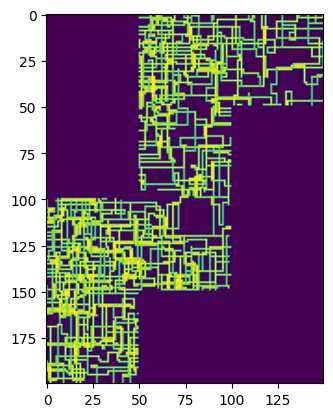

In [40]:
from matplotlib import pyplot as plt
plt.imshow(full_grid)

In [170]:
cube_sides = np.zeros(np.shape(full_grid))
for i in range(len(cube_nrs)):
    for j in range(len(cube_nrs[i])):
        if cube_nrs[i][j] != ' ':
            cube_sides[(i,j)] = cube_nrs[i][j]

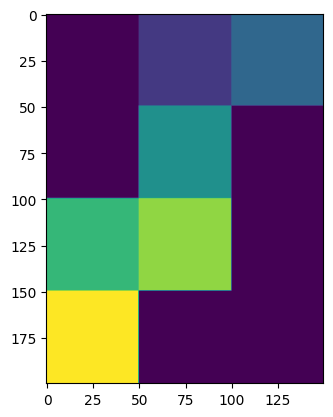

In [171]:
from matplotlib import pyplot as plt
plt.imshow(cube_sides)